## Q4(a) Data Augmentation

In [1]:
from basic_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [2]:
#hyper param
epochs = 30   
lr = 0.0004
criterion = nn.CrossEntropyLoss()# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_4a"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...
GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Loss at epoch: 0 is 4.225890738623483
IoU at epoch: 0 is 0.0336634850091472
Pixel acc at epoch: 0 is 0.16525718782629287
in train
epoch0, iter0, loss: 2.0913071632385254
epoch0, iter10, loss: 1.8285441398620605
epoch0, iter20, loss: 1.777823567390442
epoch0, iter30, loss: 1.678066611289978
epoch0, iter40, loss: 1.5184345245361328
epoch0, iter50, loss: 1.354989767074585
Finish epoch 0, time elapsed 64.05051517486572
in val
Loss at epoch: 0 is 1.3252417956079756
IoU at epoch: 0 is 0.22579806346477274
Pixel acc at epoch: 0 is 0.6981433800288609
epoch1, iter0, loss: 1.5253710746765137
epoch1, iter10, loss: 1.5730516910552979
epoch1, iter20, loss: 1.148048996925354
epoch1, iter30, loss: 1.3167616128921509
epoch1, iter40, loss: 1.3791455030441284
epoch1, iter50, loss: 1.3077023029327393
Finish epoch 1, time elapsed 63.65931057929993
in val
Loss at epoch: 1 is 1.2124253000531877
IoU at epoch: 1 is 0.14050925066417438
Pixel acc at epoch: 1 is 0.6719432047435215
epoch2, iter0, loss: 1.098021984

epoch19, iter0, loss: 0.5093324184417725
epoch19, iter10, loss: 0.3569510579109192
epoch19, iter20, loss: 0.4026893973350525
epoch19, iter30, loss: 0.44043266773223877
epoch19, iter40, loss: 0.292716920375824
epoch19, iter50, loss: 0.3808126747608185
Finish epoch 19, time elapsed 70.37174320220947
in val
Loss at epoch: 19 is 0.33741634658404757
IoU at epoch: 19 is 0.470293523789927
Pixel acc at epoch: 19 is 0.8935123341424125
epoch20, iter0, loss: 0.3759760856628418
epoch20, iter10, loss: 0.3452851176261902
epoch20, iter20, loss: 0.32661929726600647
epoch20, iter30, loss: 0.4795599579811096
epoch20, iter40, loss: 0.26432502269744873
epoch20, iter50, loss: 0.2662023901939392
Finish epoch 20, time elapsed 69.67586851119995
in val
Loss at epoch: 20 is 0.3174628274781363
IoU at epoch: 20 is 0.4838996704183667
Pixel acc at epoch: 20 is 0.8988623023033142
epoch21, iter0, loss: 0.36749327182769775
epoch21, iter10, loss: 0.3618532419204712
epoch21, iter20, loss: 0.4787237346172333
epoch21, ite

In [3]:
model_name="latest_model_4a"
latest_fcn_model = torch.load(model_name)
print(type(latest_fcn_model))
latest_fcn_model.to(device)
test(latest_fcn_model)

<class 'basic_fcn.FCN'>
in test
Loss :is 0.3840529429061072
IoU is 0.38483989275326685
Pixel is 0.8699865766933986


0

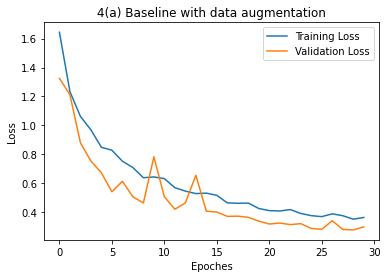

In [4]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(a) Baseline with data augmentation")
plt.savefig("plots/Q4_a")
plt.show()

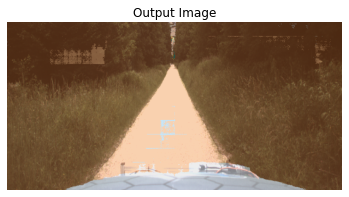

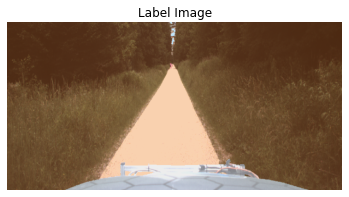

0

In [6]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize("latest_model_4a", test_loader, device)